# Problem Sheet 12 - Centrality measures for graphs

In the lecture, you heard about a number of centrality measures that can be used to identify and rank the most influential entities in graphs/networks.
The python package `networkx` offers a wide range of methods for the generation, analysis, and visualization of such networks.
The package is built around `graph` structures.
You can read about some basics like graph creation [here](https://networkx.org/documentation/stable/tutorial.html).

We start with the simple toy example from the lecture.
The following code cell specifies the example graph via its binary adjacency matrix.
`networkx` can also convert numpy adjacency matrices to `graph` objects, which in turn can easily be visualized with the `networkx.draw` command.

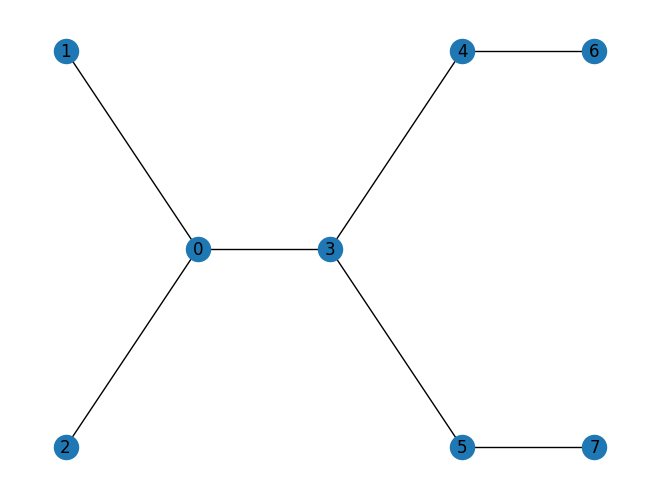

In [1]:
import numpy as np
import scipy.linalg as scla
import networkx as nx
import matplotlib.pyplot as plt

n = 8
W = np.array([[0, 1, 1, 1, 0, 0, 0, 0],
              [1, 0, 0, 0, 0, 0, 0, 0],
              [1, 0, 0, 0, 0, 0, 0, 0],
              [1, 0, 0, 0, 1, 1, 0, 0],
              [0, 0, 0, 1, 0, 0, 1, 0],
              [0, 0, 0, 1, 0, 0, 0, 1],
              [0, 0, 0, 0, 1, 0, 0, 0],
              [0, 0, 0, 0, 0, 1, 0, 0]])

p = {0: [1,0], 1: [0,1], 2: [0,-1], 3: [2,0], 4: [3,1], 5: [3,-1], 6: [4,1], 7: [4,-1]}

G = nx.from_numpy_array(W)
nx.draw(G, pos=p, with_labels=True)

plt.show()


You learned that matrix powers of the adjacency matrix contain information about the network structure.

**Task:** Play with the following line and remember how the entries in the resulting $8 \times 8$ matrix can be interpreted.

In [2]:
np.linalg.matrix_power(W, 2)

array([[3, 0, 0, 0, 1, 1, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0],
       [0, 1, 1, 3, 0, 0, 1, 1],
       [1, 0, 0, 0, 2, 1, 0, 0],
       [1, 0, 0, 0, 1, 2, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 1]])

Furtunately, `networkx` has a [variety of centrality measures pre-implemented](https://networkx.org/documentation/stable/reference/algorithms/centrality.html).
We will use the provided functions for the computation of degree, closeness, betweenness, eigenvector, and PageRank centrality.
We also want to visualize the centrality scores of our networks by choosing the node size proportional to the obtained centrality value.

We discussed matrix function-based centrality measures in more detail.
They are defined as certain matrix function expressions involving the matrix exponential and resolvent function.
The code block below is missing the functions to compute subgraph centrality
$$
SC(i,\beta) = e_i^T \exp(\beta W) e_i
$$
and Katz centrality
$$
KC(i,\alpha) = e_i^T (I - \alpha W)^{-1} \mathbb{1}.
$$

**Task:** Implement subgraph and Katz centrality.

In [3]:
def draw_centralities(G, plot_centrality, plot_factor, p=0):
    '''
    Visualizes the specified graph object `G`.
    `plot_centrality` specifies the centrality measure to be used
    `plot_factor` can be used to control the size of the nodes
    `p` is an optional dict that specifies the node locations
    '''
    if p==0:
        nx.draw(G, node_size = plot_factor*plot_centrality)
    else:
        nx.draw(G, pos = p, node_size = plot_factor*plot_centrality)
    return

def compute_centralities(W, G, alpha_factor, beta_factor):
    ## compute largest eigenvalue lambda_1 of the adjacency matrix
    lamb, phi = np.linalg.eig(W)
    lmax = lamb[np.argmax(lamb)]

    ## compute degree centrality
    d = nx.degree_centrality(G)
    d = np.array(list(d.items()))[:,1]

    ## compute closeness and betweenness centrality
    CC = nx.closeness_centrality(G)
    CC = np.array(list(CC.items()))[:,1]
    BC = nx.betweenness_centrality(G)
    BC = np.array(list(BC.items()))[:,1]

    ## compute plain eigenvector centrality and PageRank
    EC = nx.eigenvector_centrality(G)
    EC = np.array(list(EC.items()))[:,1]
    PR = nx.pagerank(G, alpha=0.85, max_iter=500)
    PR = np.array(list(PR.items()))[:,1]

    ## compute matrix function-based centralities
    # set parameters relative to the largest eigenvalue of the adjacency matrix
    alpha = alpha_factor/lmax
    beta = beta_factor/lmax

    # functions to compute subgraph centrality (SC), total communicability (TC),
    # resolvent-based subgraph centrality (SCres), and Katz centrality (KC)
    SC = lambda W, beta: np.diag(np.exp(beta*W))
    TC = lambda W, beta: scla.expm(beta*W) @ np.ones((n,1))
    SCres = lambda W, alpha: np.diag(np.linalg.solve(np.eye(n) - alpha*W, np.eye(n)))
    KC = lambda W, alpha: np.linalg.solve((np.eye(n)- alpha*W),np.ones((n,1)))
    # (I-aW)x=1 

    SC = SC(W, beta)
    TC = TC(W, beta)
    SCres = SCres(W, alpha)
    KC = KC(W, alpha)
    
    return d, CC, BC, EC, PR, SC, TC, SCres, KC

If all went well, you should now be able to reproduce the results from the lecture.
Don't worry if the results differ by a constant factor; they may be introduced by some form of normalization.

**Task:** Experiment with the different centrality measures and parameters.

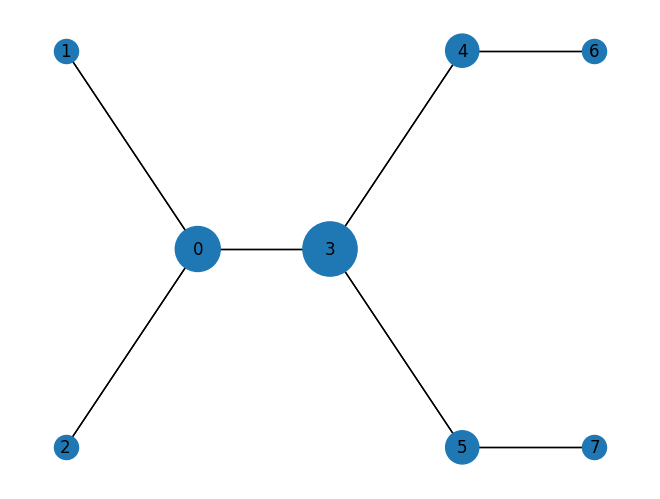

In [5]:
n = 8
W = np.array([[0, 1, 1, 1, 0, 0, 0, 0],
              [1, 0, 0, 0, 0, 0, 0, 0],
              [1, 0, 0, 0, 0, 0, 0, 0],
              [1, 0, 0, 0, 1, 1, 0, 0],
              [0, 0, 0, 1, 0, 0, 1, 0],
              [0, 0, 0, 1, 0, 0, 0, 1],
              [0, 0, 0, 0, 1, 0, 0, 0],
              [0, 0, 0, 0, 0, 1, 0, 0]])
G = nx.from_numpy_array(W)
nx.draw(G, pos=p, with_labels=True)
p = {0: [1,0], 1: [0,1], 2: [0,-1], 3: [2,0], 4: [3,1], 5: [3,-1], 6: [4,1], 7: [4,-1]}

d, CC, BC, EC, PR, SC, TC, SCres, KC = compute_centralities(W, G, 0.5, 2)

plot_centrality = BC
plot_factor = 2000

draw_centralities(G, plot_centrality, plot_factor, p)

The remainder of the notebook generates a few example networks with somewhat larger size.

**Task:**
Feel free to click yourself through the networks, try out different centrality measures, think about different structural properties of the networks revealed by centrality measures, and, perhaps, generate a few cool networks of your own.

Hint:
Randomness is involved in the creation of some of the graphs, so it may be interesting to run some code blocks repeatedly.

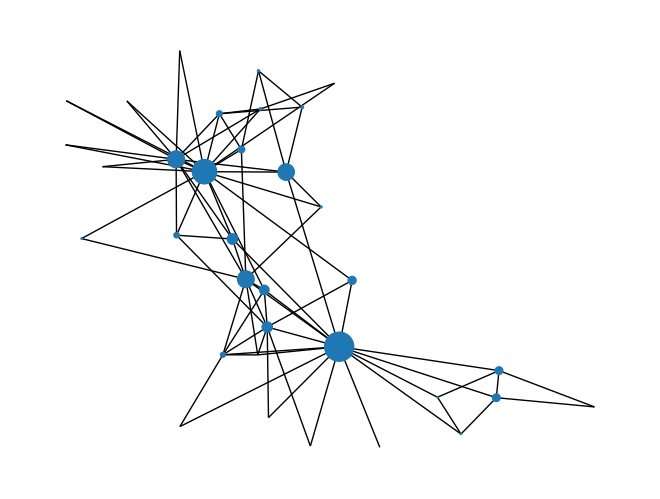

In [6]:
G = nx.karate_club_graph()
W = .5*(nx.to_numpy_array(G) + nx.to_numpy_array(G).T)
n = W.shape[0]

d, CC, BC, EC, PR, SC, TC, SCres, KC = compute_centralities(W, G, 0.5, 2)

plot_centrality = BC
plot_factor = 1000

draw_centralities(G, plot_centrality, plot_factor)

In [22]:
from operator import itemgetter
import networkx as nx
n, m = 500, 2
G = nx.barabasi_albert_graph(n, m)
node_and_degree = G.degree()
(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]
G = nx.ego_graph(G, largest_hub)
W = nx.to_numpy_array(G)
n = W.shape[0]

d, CC, BC, EC, PR, SC, TC, SCres, KC = compute_centralities(W, G, 0.5, 2)

plot_centrality = TC
plot_factor = 2000

#draw_centralities(G, plot_centrality, plot_factor)
plt.show()

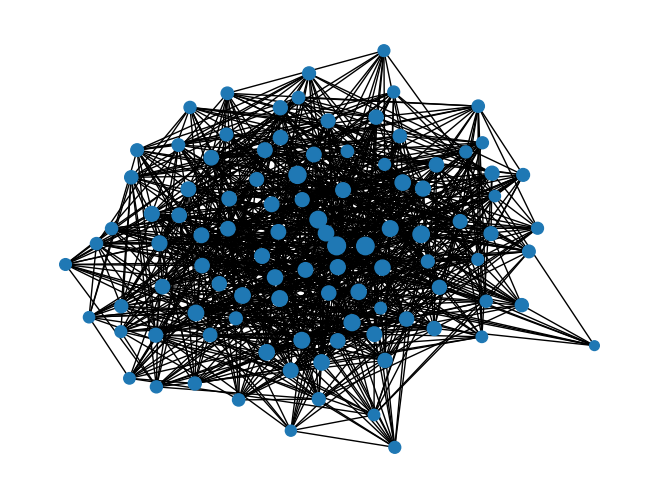

In [9]:
n, m = 100, 1e03
G = nx.gnm_random_graph(n, m)
W = nx.to_numpy_array(G)

d, CC, BC, EC, PR, SC, TC, SCres, KC = compute_centralities(W, G, 0.5, 2)

plot_centrality = EC
plot_factor = 1000

draw_centralities(G, plot_centrality, plot_factor)

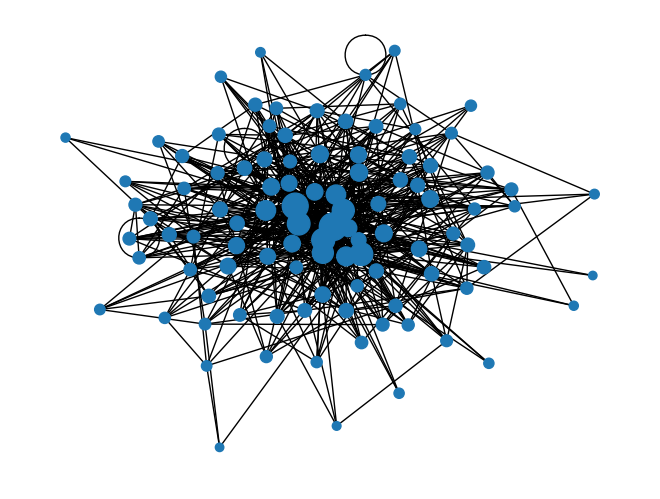

In [10]:
n = 100
p = 0.6
w = [n * i**(-p) for i in range(1,n+1)]
G = nx.expected_degree_graph(w)
W = nx.to_numpy_array(G)

d, CC, BC, EC, PR, SC, TC, SCres, KC = compute_centralities(W, G, 0.5, 2)

plot_centrality = TC
plot_factor = 20

draw_centralities(G, plot_centrality, plot_factor)

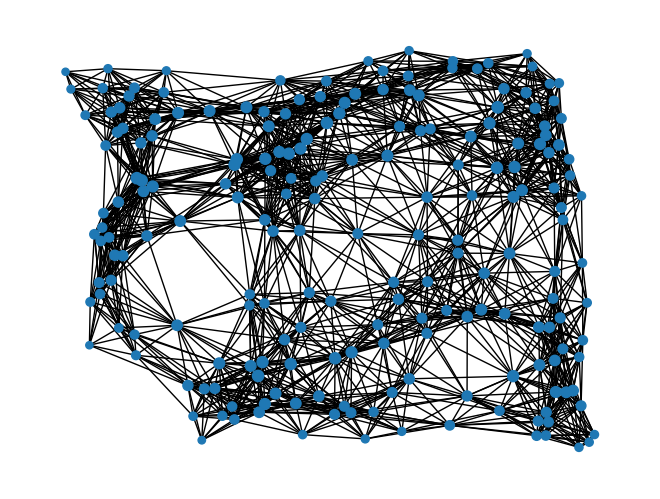

In [20]:
n = 200
G = nx.random_geometric_graph(n, 0.2)
p = nx.get_node_attributes(G, 'pos')
W = nx.to_numpy_array(G)

d, CC, BC, EC, PR, SC, TC, SCres, KC = compute_centralities(W, G, 0.5, 2)

plot_centrality = PR
plot_factor = 10000

draw_centralities(G, plot_centrality, plot_factor)